In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('preterm.csv')
df = df.drop_duplicates()
df.head()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
0,11055,218320,53231.010,1.860,2,1
1,9118,222820,62367.488,1.580,2,1
2,7925,13481,60503.050,2.067,2,1
3,12451,17474,53628.078,1.731,2,1
4,11152,218320,53317.910,1.857,2,1


In [4]:
X = df.drop('Pre-term', axis = 1)
y = df['Pre-term']

In [5]:
X = pd.DataFrame(StandardScaler().fit_transform(X))
X.head()

,0,1,2,3,4
0,2.255122,3.113071,0.504462,1.856617,1.692456
1,1.743780,3.186243,1.554051,1.326487,1.692456
2,1.428844,-0.217712,1.339866,2.248534,1.692456
3,2.623648,-0.152784,0.550077,1.612378,1.692456
4,2.280729,3.113071,0.514445,1.850937,1.692456


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Decision Tree

In [8]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=42)  
classifier.fit(x_train, y_train);

y_pred= classifier.predict(x_test)  

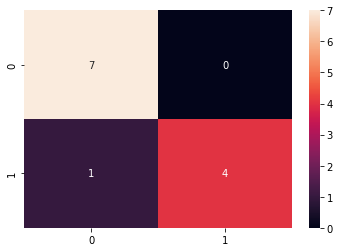

In [14]:
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot = True)
plt.show()

In [15]:
print("\n Classification report for classifier %s:\n%s\n" % (classifier, metrics.classification_report(y_test, y_pred)))


 Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=42):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.80      0.89         5

    accuracy                           0.92        12
   macro avg       0.94      0.90      0.91        12
weighted avg       0.93      0.92      0.91        12




### Random Forest

In [16]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(x_train, y_train);

y_pred = rfc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


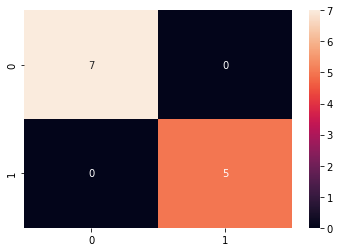

In [17]:
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot = True)
plt.show()

In [18]:
print("\n Classification report for classifier %s:\n%s\n" % (rfc, metrics.classification_report(y_test, y_pred)))


 Classification report for classifier RandomForestClassifier(n_estimators=10, random_state=42):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12




### Logistic Regression

In [22]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

accuracy = lr_model.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


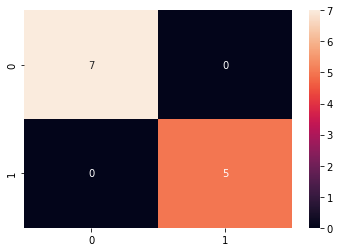

In [24]:
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot = True)
plt.show()

In [23]:
print("\n Classification report for classifier %s:\n%s\n" % (lr_model, metrics.classification_report(y_test, y_pred)))


 Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12


